# 🧹 Handling Outliers in a Dataset

Once we identify outliers, we must decide how to **handle** them.  
Outliers can:
- Be **errors** (data entry mistakes)
- Or be **genuine extremes** (valuable rare events)

So, depending on context, we have three main strategies:
1️⃣ **Remove** outliers  
2️⃣ **Replace** them (with median or mean)  
3️⃣ **Cap/Winsorize** them (limit extreme values)


In [11]:
import numpy as np
import pandas as pd

# 🎯 Dataset with extreme outliers
marks = pd.Series([-100, -200, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 98, 99, 67, 74, 150, 170, 180])

# Compute quartiles and IQR
Q1 = marks.quantile(0.25)
Q3 = marks.quantile(0.75)
IQR = Q3 - Q1

# Compute fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


Lower Fence: 0.0
Upper Fence: 144.0


In [12]:
# Identify outliers based on IQR fences
outliers = marks[(marks < lower_fence) | (marks > upper_fence)]
print("Outliers detected:")
print(outliers.values)


Outliers detected:
[-100 -200  150  170  180]


### 💡 Note
At this stage, we’ve found four outliers:
- Two **low** outliers (−100, −200)
- Two **high** outliers (170, 180)


## Method 1: Remove Outliers

In [13]:
# Remove outliers using boolean indexing
marks_removed = marks[(marks >= lower_fence) & (marks <= upper_fence)]

print(f"Original count: {len(marks)}")
print(f"After removal: {len(marks_removed)}")


Original count: 21
After removal: 16


### ✅ When to use:
- When outliers are clearly data entry errors (e.g., −200 marks)
- Or when you have enough data and removing a few won’t affect results

## Method 2: Replace Outliers (Imputation)

In [14]:
# Replace outliers with the median
median_value = marks.median()

marks_replaced = marks.copy()
marks_replaced[marks_replaced < lower_fence] = median_value
marks_replaced[marks_replaced > upper_fence] = median_value

print("Replaced Outliers with Median Value:", median_value)
print(marks_replaced.tolist())


Replaced Outliers with Median Value: 74.0
[74, 74, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 98, 99, 67, 74, 74, 74, 74]


### ✅ When to use:
- When data is small and dropping outliers may cause information loss
- Median is robust because it’s not influenced by extreme values

## Method 3: Cap Outliers (Winsorization)

In [15]:
# Cap extreme values to the nearest fence value
marks_capped = marks.copy()
marks_capped[marks_capped < lower_fence] = lower_fence
marks_capped[marks_capped > upper_fence] = upper_fence

print("Capped values at fences:")
print(marks_capped.tolist())


Capped values at fences:
[0, 0, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 98, 99, 67, 74, 144, 144, 144]


### ✅ When to use:
- When outliers are genuine but you want to limit their influence
- Common in financial or survey data (e.g., very high incomes, extreme ratings)

## Compare All Three Approaches

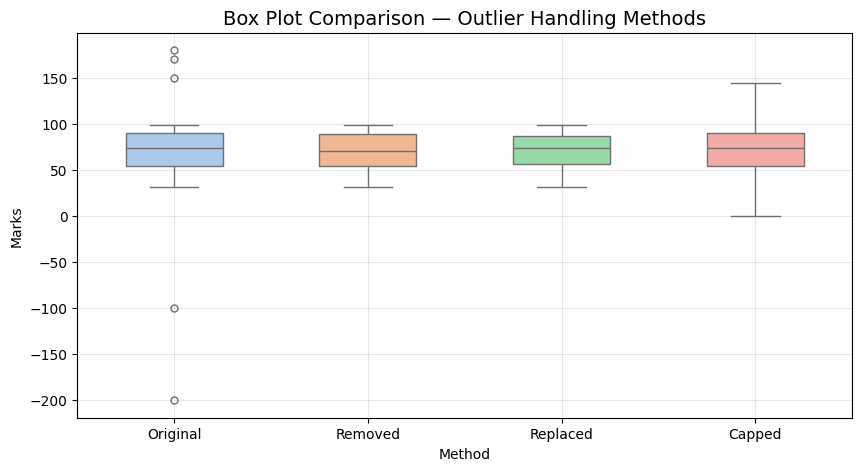

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------------------
# ✅ Step 1: Combine all series into a single DataFrame
# --------------------------------------------------------------
df_box = pd.DataFrame({
    'Original': marks,
    'Removed': pd.Series(marks_removed),
    'Replaced': pd.Series(marks_replaced),
    'Capped': pd.Series(marks_capped)
})

# Melt the DataFrame into long (tidy) format for Seaborn
df_melted = df_box.melt(var_name='Method', value_name='Marks')

# --------------------------------------------------------------
# 🎨 Step 2: Create Box Plot using Seaborn
# --------------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='Method',
    y='Marks',
    data=df_melted,
    palette='pastel',
    width=0.5,
    fliersize=5,
    hue='Method'
)
plt.title("Box Plot Comparison — Outlier Handling Methods", fontsize=14)
plt.ylabel("Marks")
plt.grid(alpha=0.3)
plt.show()


### 🧠 Interpretation of Box Plot Comparison

| Version | Description | Behavior |
|----------|--------------|-----------|
| **Original** | Contains all values including −200 and 180 | Extreme whiskers and dots (outliers visible) |
| **Removed** | Outliers dropped | Box shrinks, no extreme dots |
| **Replaced** | Outliers replaced with median | Box looks balanced, no sharp edges |
| **Capped** | Outliers limited to fence | Still retains all samples, but within limits |

✅ Each method depends on **data context**:
- **Remove** → when wrong or dirty data  
- **Replace** → when you want stability  
- **Cap** → when you need to preserve size but control influence
---
### 🧾 Summary Table

| Method             | Technique             | When to Use                         | Effect on Data             |
| ------------------ | --------------------- | ----------------------------------- | -------------------------- |
| 🗑️ Remove         | Drop outliers         | Clear errors, large datasets        | Reduces dataset size       |
| 🔁 Replace         | Fill with median/mean | Small datasets, stable distribution | Keeps dataset consistent   |
| ⚙️ Cap (Winsorize) | Limit to fences       | Keep all data, reduce extremes      | Retains all records safely |

